In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
type(x_test)

numpy.ndarray

In [5]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
          layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)),
          layers.MaxPool2D(2,2),
          layers.Conv2D(5,(5, 5), activation='relu'),
          layers.MaxPool2D(2,2),  
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
          layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


shape = x_test.shape[1:]
latent_dim = 2
autoencoder = Autoencoder(latent_dim, shape)

In [6]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [7]:
autoencoder.build(input_shape=(3000,28, 28))

In [8]:
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - val_loss: 0.0588
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0577 - val_loss: 0.0567
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0563 - val_loss: 0.0556
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0556 - val_loss: 0.0551
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0552 - val_loss: 0.0548
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0550 - val_loss: 0.0547
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0549 - val_loss: 0.0546
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0548 - val_loss: 0.0545
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0548 - val_loss: 0.0544
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.054

In [9]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 1677      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            2352      
                                                                 
Total params: 4029 (15.74 KB)
Trainable params: 4029 (15.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history.history

{'loss': [0.06514310836791992,
  0.05773133412003517,
  0.056257523596286774,
  0.05555122718214989,
  0.05523046851158142,
  0.05503728613257408,
  0.05491682514548302,
  0.054837387055158615,
  0.05477737635374069,
  0.05473092570900917,
  0.05468932166695595,
  0.054662320762872696,
  0.05463733151555061,
  0.054615337401628494,
  0.05459798127412796,
  0.0545811764895916,
  0.054564498364925385,
  0.05455715209245682,
  0.054541993886232376,
  0.05453843995928764,
  0.054529763758182526,
  0.05452286824584007,
  0.05451519042253494,
  0.054509107023477554,
  0.05449953302741051,
  0.054494455456733704,
  0.05449122190475464,
  0.05448809638619423,
  0.05448540672659874,
  0.05447326600551605],
 'val_loss': [0.058814823627471924,
  0.05672026798129082,
  0.055592652410268784,
  0.05510394275188446,
  0.054821595549583435,
  0.054693736135959625,
  0.05463689565658569,
  0.054526813328266144,
  0.0544319711625576,
  0.0543878898024559,
  0.05437226593494415,
  0.05435123294591904,
  

Text(0, 0.5, 'Loss [CrossEntropy]')

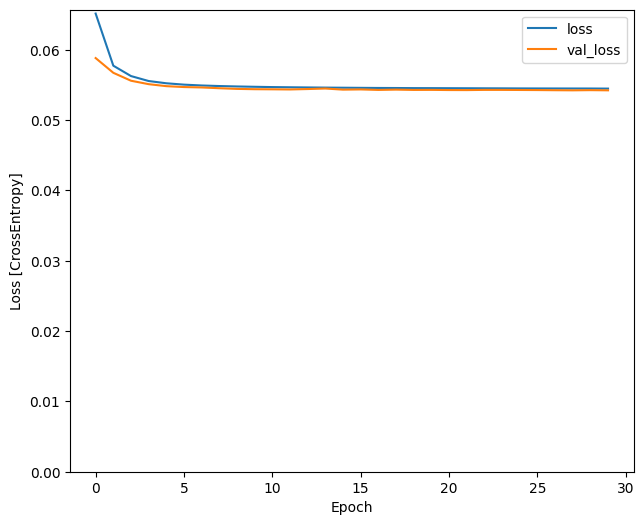

In [11]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')


In [12]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(autoencoder, to_file=dot_img_file, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [14]:
import random

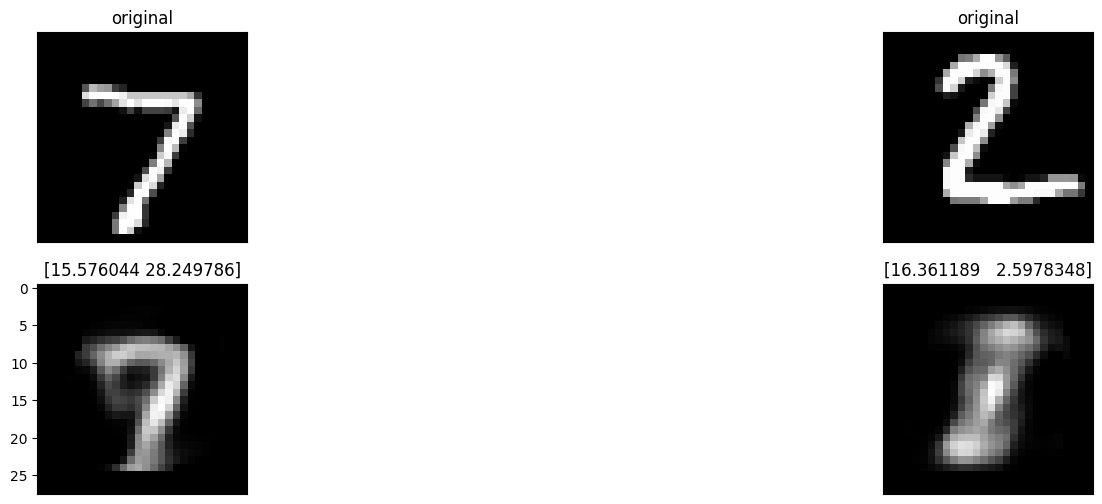

In [15]:
n = 2
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title(f"{encoded_imgs[i]}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    
    
ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
df = pd.DataFrame(encoded_imgs)
df['label'] = pd.Series(y_test)

In [17]:
!pip install seaborn
import seaborn as sns

In [18]:
pallet = sns.color_palette("Spectral",10).as_hex()

In [19]:
df['color'] = df['label'].map(lambda x: pallet[x])

In [20]:
pallet

['#d0384e',
 '#ee6445',
 '#fa9b58',
 '#fece7c',
 '#fff1a8',
 '#f4faad',
 '#d1ed9c',
 '#97d5a4',
 '#5cb7aa',
 '#3682ba']

<Axes: xlabel='0', ylabel='1'>

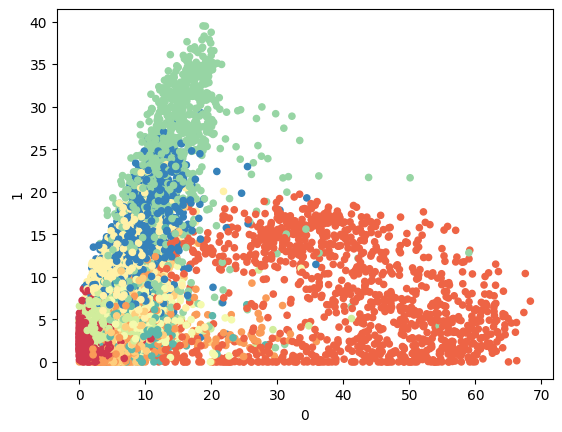

In [21]:
df.plot.scatter(x=0,y=1, c='color')

In [22]:
# -------------------- END OF EXAMPLE

In [94]:
# train, test load data

In [95]:
# train autoencoder
# plot loss ae

In [96]:
# prepare data aumentated for same class match
# train VAE 
# plot loss vae

In [97]:
# calculate encoded_vector_ae using autoencoder
# calculate encoded_vector_vae using Variational autoencoder

In [99]:
# create function to calculate metric topK class metric
# calculateMetric(encoded_vector_ae)
# calculateMetric(encoded_vector_vae)

In [100]:
# data visualisation metrics

In [101]:
# discuss results

In [ ]:
# if there is time, apply in another dataset